<h3><center>Sales Forecast by Facebook Prophet </center>

In [6]:
### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
### Data from Kaggle :https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset
df=pd.read_excel('C:\\Users\\Adrian\\Desktop\\Transfer\\Data_sets\\Adidas Sales Dataset\\Adidas US Sales Datasets.xlsx')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [8]:
df.isna().sum() ### we don't have any missing data

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [10]:
pd.Series(df["City"].unique())

0           New York
1            Houston
2      San Francisco
3        Los Angeles
4            Chicago
5             Dallas
6       Philadelphia
7          Las Vegas
8             Denver
9            Seattle
10             Miami
11       Minneapolis
12          Billings
13         Knoxville
14             Omaha
15        Birmingham
16          Portland
17         Anchorage
18          Honolulu
19           Orlando
20            Albany
21          Cheyenne
22          Richmond
23           Detroit
24         St. Louis
25    Salt Lake City
26       New Orleans
27             Boise
28           Phoenix
29       Albuquerque
30           Atlanta
31        Charleston
32         Charlotte
33          Columbus
34        Louisville
35           Jackson
36       Little Rock
37     Oklahoma City
38           Wichita
39       Sioux Falls
40             Fargo
41        Des Moines
42         Milwaukee
43      Indianapolis
44         Baltimore
45        Wilmington
46            Newark
47          H

In [11]:
df_cities = df.groupby('City', as_index=False)['Operating Profit'].sum() ### which city generated the hightest profit 
sorted_df_cities = df_cities.sort_values(by='Operating Profit', ascending=False)
sorted_df_cities

,City,Operating Profit
10,Charleston,15607190.11
35,New York,13899973.16
31,Miami,12168619.11
42,Portland,10760799.37
46,San Francisco,10256249.56
22,Houston,9845141.06
11,Charlotte,9756422.87
0,Albany,9429850.91
34,New Orleans,9417233.49
6,Birmingham,9147581.39


In [12]:
pd.Series(df["Product"].unique())

0        Men's Street Footwear
1      Men's Athletic Footwear
2      Women's Street Footwear
3    Women's Athletic Footwear
4                Men's Apparel
5              Women's Apparel
dtype: object

In [13]:
df_product = df.groupby('Product', as_index=False)['Total Sales'].sum() ### which product has the highest sales
sorted_df_product = df_product.sort_values(by='Total Sales', ascending=False)
sorted_df_product

,Product,Total Sales
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
1,Men's Athletic Footwear,153673680.0
5,Women's Street Footwear,128002813.0
0,Men's Apparel,123728632.0
4,Women's Athletic Footwear,106631896.0


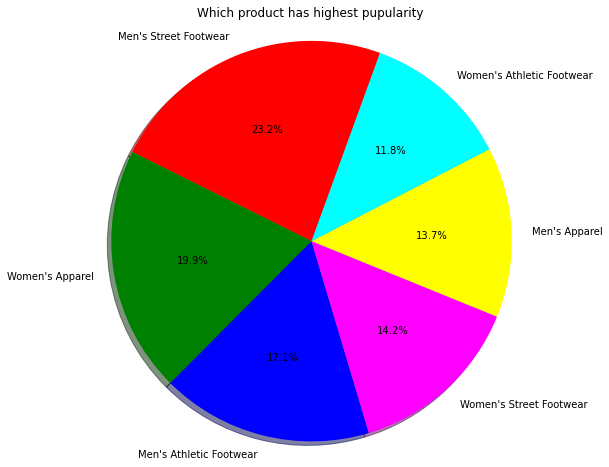

In [14]:
colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'purple']
plt.figure(figsize=(8, 8))
plt.pie(sorted_df_product["Total Sales"], labels=sorted_df_product["Product"], autopct='%1.1f%%', startangle=70,colors=colors, shadow=True)
plt.axis('equal')
plt.title('Which product has highest pupularity')
plt.show()

In [15]:
pd.Series(df["Retailer"].unique())

0      Foot Locker
1          Walmart
2    Sports Direct
3        West Gear
4           Kohl's
5           Amazon
dtype: object

In [16]:
df_retailer = df.groupby('Retailer', as_index=False)['Total Sales'].sum() ### which retailer has the highest sales
sorted_df_retailer = df_retailer.sort_values(by='Total Sales', ascending=False)
sorted_df_retailer

,Retailer,Total Sales
5,West Gear,242964333.0
1,Foot Locker,220094720.0
3,Sports Direct,182470997.0
2,Kohl's,102114753.0
0,Amazon,77698912.0
4,Walmart,74558410.0


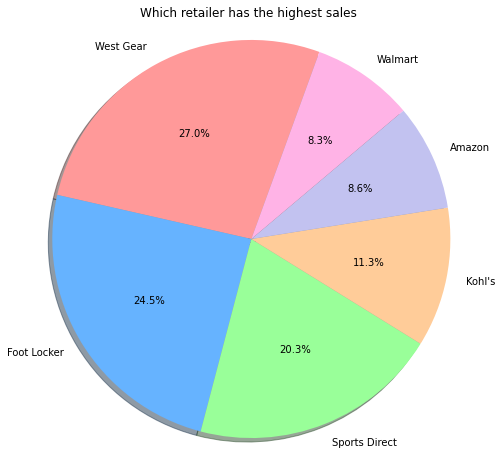

In [17]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#dfff80', '#ff0000']
plt.figure(figsize=(8, 8))
plt.pie(sorted_df_retailer["Total Sales"], labels=sorted_df_retailer["Retailer"], autopct='%1.1f%%', startangle=70,colors=colors, shadow=True)
plt.axis('equal')
plt.title('Which retailer has the highest sales')
plt.show()

In [18]:
pd.Series(df["Sales Method"].unique())

0    In-store
1      Outlet
2      Online
dtype: object

In [19]:
df_method = df.groupby('Sales Method', as_index=False)['Total Sales'].sum() ### which method is most popular
sorted_df_method = df_method.sort_values(by='Total Sales', ascending=False)
sorted_df_method 

,Sales Method,Total Sales
0,In-store,356643750.0
2,Outlet,295585493.0
1,Online,247672882.0


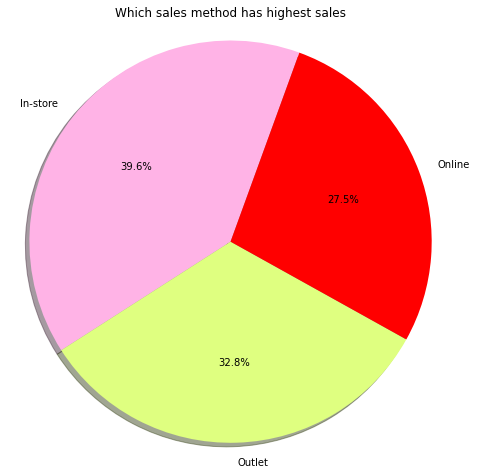

In [20]:
colors = ['#ffb3e6', '#dfff80', '#ff0000']
plt.figure(figsize=(8, 8))
plt.pie(sorted_df_method["Total Sales"], labels=sorted_df_method["Sales Method"], autopct='%1.1f%%', startangle=70,colors=colors, shadow=True)
plt.axis('equal')
plt.title('Which sales method has highest sales')
plt.show()

In [21]:
df_grouped = df.groupby('Invoice Date', as_index=False)['Total Sales'].sum() ### Picking 2 columns which are demand for Prophet
df_grouped

,Invoice Date,Total Sales
0,2020-01-01,845141.0
1,2020-01-02,689410.0
2,2020-01-03,632573.0
3,2020-01-04,615080.0
4,2020-01-05,707829.0
...,...,...
719,2021-12-27,602353.0
720,2021-12-28,301010.0
721,2021-12-29,211109.0
722,2021-12-30,167903.0


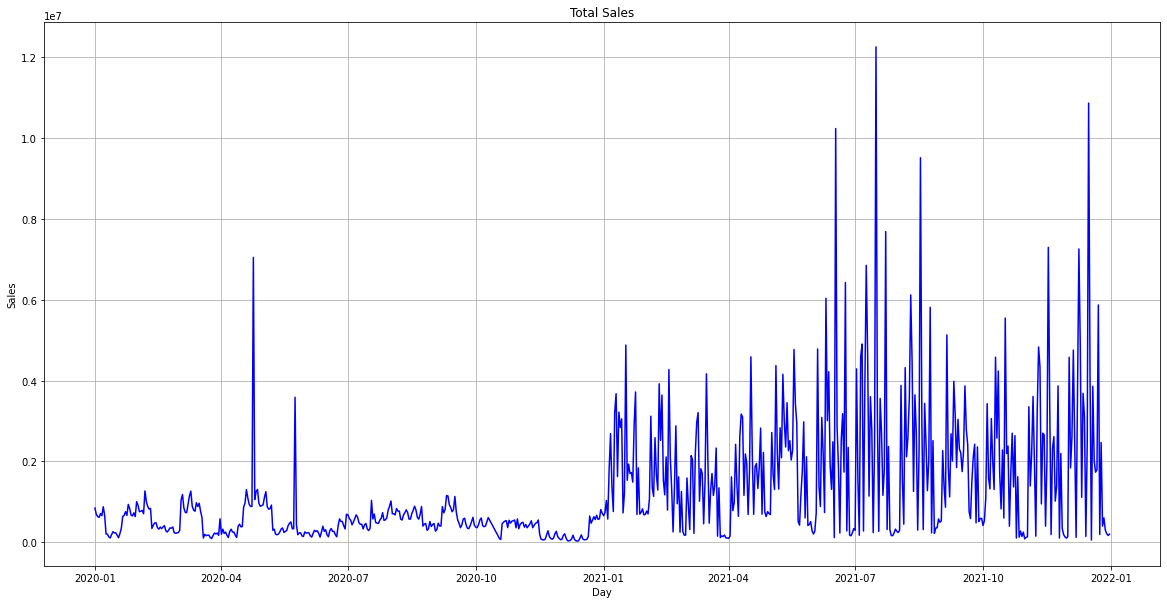

In [22]:
plt.figure(figsize=(20, 10))

plt.plot(df_grouped["Invoice Date"], df_grouped["Total Sales"], color='blue') 

plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Total Sales')

plt.grid(True)

### Adidas total sales 


In [23]:
df_grouped.head()

,Invoice Date,Total Sales
0,2020-01-01,845141.0
1,2020-01-02,689410.0
2,2020-01-03,632573.0
3,2020-01-04,615080.0
4,2020-01-05,707829.0


In [24]:
df_grouped.rename(columns={'Invoice Date':'ds','Total Sales':'y'}, inplace= True) ### Changing name on "ds" and "y"[its obligatory for Prophet] 
df_grouped

,ds,y
0,2020-01-01,845141.0
1,2020-01-02,689410.0
2,2020-01-03,632573.0
3,2020-01-04,615080.0
4,2020-01-05,707829.0
...,...,...
719,2021-12-27,602353.0
720,2021-12-28,301010.0
721,2021-12-29,211109.0
722,2021-12-30,167903.0


In [4]:
!pip install prophet ### Prophet instalation


  Using cached prophet-1.1.4-py3-none-win_amd64.whl (12.9 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.29-py3-none-any.whl (695 kB)
  Using cached importlib_resources-6.0.0-py3-none-any.whl (31 kB)
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)


In [5]:
from prophet import Prophet ### importing Prophet module

In [25]:
First = pd.DataFrame({
  'holiday': 'First',
  'ds': pd.to_datetime(['2021-01-01','2020-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})
Luther = pd.DataFrame({
  'holiday': 'Luther',
  'ds': pd.to_datetime(['2021-01-18','2020-01-20']),
  'lower_window': 0,
  'upper_window': 1,
})
President = pd.DataFrame({
  'holiday': 'President',
  'ds': pd.to_datetime(['2020-02-17','2020-02-15']),
  'lower_window': 0,
  'upper_window': 1,
})  
Memory = pd.DataFrame({
  'holiday': 'Memory',
  'ds': pd.to_datetime(['2021-05-31','2021-05-25']),
  'lower_window': 0,
  'upper_window': 1,
})   
Independence1 = pd.DataFrame({
  'holiday': 'Independence1',
  'ds': pd.to_datetime(['2021-07-03','2020-07-03']),
  'lower_window': 0,
  'upper_window': 1,
})
Independence2 = pd.DataFrame({
  'holiday': 'Independence2',
  'ds': pd.to_datetime(['2021-07-04','2020-07-04']),
  'lower_window': 0,
  'upper_window': 1,
})
Work = pd.DataFrame({
  'holiday': 'Work',
  'ds': pd.to_datetime(['2021-09-07','2020-09-06']),
  'lower_window': 0,
  'upper_window': 1,
})
Columbus = pd.DataFrame({
  'holiday': 'Columbus',
  'ds': pd.to_datetime(['2021-10-12','2020-10-11']),
  'lower_window': 0,
  'upper_window': 1,
})
Veteran = pd.DataFrame({
  'holiday': 'Veteran',
  'ds': pd.to_datetime(['2021-11-11','2020-11-11']),
  'lower_window': 0,
  'upper_window': 1,
})
Thanks = pd.DataFrame({
  'holiday': 'Thanks',
  'ds': pd.to_datetime(['2021-11-25','2020-11-26']),
  'lower_window': 0,
  'upper_window': 1,
})
Christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2021-12-25','2020-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})
    
holidays = pd.concat((First,Luther,President,Memory,Independence1,Independence2,Work,Columbus,Veteran,Thanks,Christmas))

### Adjusting holidays in our forecast

In [26]:
m = Prophet(holidays=holidays)
m.fit(df_grouped) ### fitting our data into prophet

21:12:43 - cmdstanpy - INFO - Chain [1] start processing
21:12:43 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=365)
future.tail(5) ### Creating prodiction

,ds
1084,2022-12-27
1085,2022-12-28
1086,2022-12-29
1087,2022-12-30
1088,2022-12-31


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,52418.795946,-1.559983e+06,1.585384e+06
1,2020-01-02,265678.869602,-1.323716e+06,1.968703e+06
2,2020-01-03,121339.433090,-1.486086e+06,1.662518e+06
3,2020-01-04,-63566.154272,-1.834644e+06,1.482212e+06
4,2020-01-05,1292.164396,-1.675335e+06,1.608792e+06


In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Columbus,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,78308.690262,-1.559983e+06,1.585384e+06,78308.690262,78308.690262,0.0,0.0,0.0,0.0,...,-100711.565104,-100711.565104,-100711.565104,-232972.350637,-232972.350637,-232972.350637,0.0,0.0,0.0,52418.795946
1,2020-01-02,80371.225294,-1.323716e+06,1.968703e+06,80371.225294,80371.225294,0.0,0.0,0.0,0.0,...,167061.003707,167061.003707,167061.003707,-182955.525360,-182955.525360,-182955.525360,0.0,0.0,0.0,265678.869602
2,2020-01-03,82433.760326,-1.486086e+06,1.662518e+06,82433.760326,82433.760326,0.0,0.0,0.0,0.0,...,168940.315357,168940.315357,168940.315357,-130034.642593,-130034.642593,-130034.642593,0.0,0.0,0.0,121339.433090
3,2020-01-04,84496.295358,-1.834644e+06,1.482212e+06,84496.295358,84496.295358,0.0,0.0,0.0,0.0,...,-73323.507443,-73323.507443,-73323.507443,-74738.942187,-74738.942187,-74738.942187,0.0,0.0,0.0,-63566.154272
4,2020-01-05,86558.830390,-1.675335e+06,1.608792e+06,86558.830390,86558.830390,0.0,0.0,0.0,0.0,...,-67627.447964,-67627.447964,-67627.447964,-17639.218030,-17639.218030,-17639.218030,0.0,0.0,0.0,1292.164396


In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Columbus,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1084,2022-12-27,4.349683e+06,2.305123e+06,5.602933e+06,4.229072e+06,4.462509e+06,0.0,0.0,0.0,0.0,...,79951.459748,79951.459748,79951.459748,-418120.379602,-418120.379602,-418120.379602,0.0,0.0,0.0,4.011514e+06
1085,2022-12-28,4.354094e+06,2.239050e+06,5.553953e+06,4.233082e+06,4.467369e+06,0.0,0.0,0.0,0.0,...,-100711.565104,-100711.565104,-100711.565104,-387276.823481,-387276.823481,-387276.823481,0.0,0.0,0.0,3.866106e+06
1086,2022-12-29,4.358505e+06,2.578303e+06,5.773054e+06,4.237124e+06,4.472229e+06,0.0,0.0,0.0,0.0,...,167061.003707,167061.003707,167061.003707,-351871.367757,-351871.367757,-351871.367757,0.0,0.0,0.0,4.173695e+06
1087,2022-12-30,4.362916e+06,2.701408e+06,5.881412e+06,4.240926e+06,4.477208e+06,0.0,0.0,0.0,0.0,...,168940.315358,168940.315358,168940.315358,-312112.576282,-312112.576282,-312112.576282,0.0,0.0,0.0,4.219744e+06
1088,2022-12-31,4.367327e+06,2.344318e+06,5.683650e+06,4.244783e+06,4.482480e+06,0.0,0.0,0.0,0.0,...,-73323.507443,-73323.507443,-73323.507443,-268289.816683,-268289.816683,-268289.816683,0.0,0.0,0.0,4.025714e+06


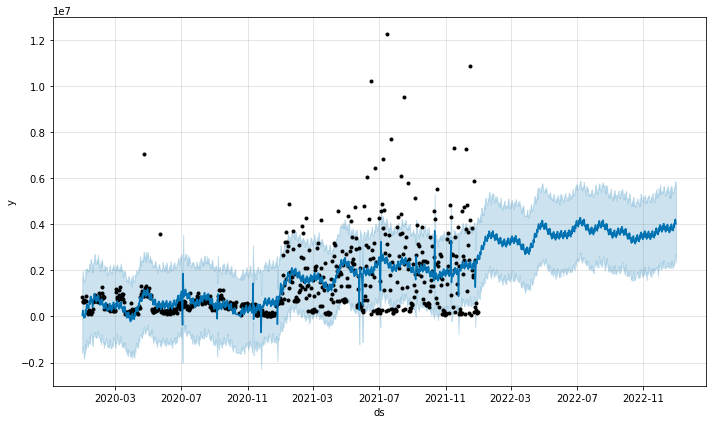

In [36]:
fig1 = m.plot(forecast)

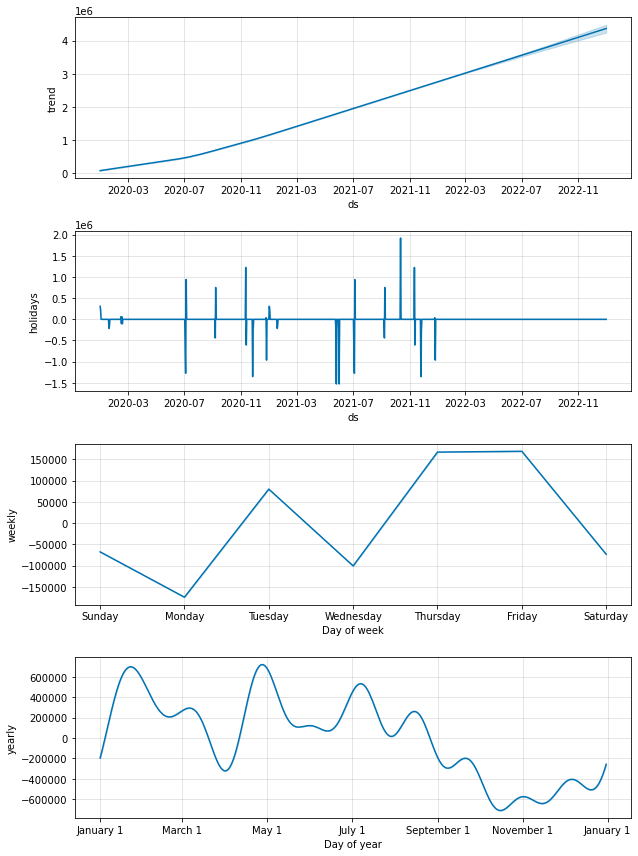

In [37]:
fig2 = m.plot_components(forecast)


In [38]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [39]:
plot_components_plotly(m, forecast)